# Visualising Data With GeoPandas

How to convert OSM data into a GeoPandas frame for further processing.

## Task

Show the street network of the input data on a map with different colors for the different maximum speeds.

## Solution

[GeoPanadas](https://geopandas.org) is a useful tool to help you process and visualise geodata in a Jupyter notebook. It can read data from many sources. Among others, it can read geo features from a Python iterable where each element implements the [`__geo_interface__`](https://gist.github.com/sgillies/2217756). An 'osmium.FileProcessor' happens to behave like a Python iterable. To make it compatible with GeoPandas, the output objects need to be extended with a `__geo_interface__`. This can be done with the GeoInterfaceFilter. This filter adds a geometry to the object. Therefore, geometry processing needs to be enabled accordingly:

In [1]:
import osmium
import geopandas

In [2]:
fp = osmium.FileProcessor('../data/buildings.opl')\
         .with_areas()\
         .with_filter(osmium.filter.GeoInterfaceFilter())

features = geopandas.GeoDataFrame.from_features(fp)
len(features)

11

This will load every single OSM object into the GeoDataFrame as long as it can be converted into a geometry, including all untagged nodes. This is usually not what you want. Therefore it is important to carefully filter the data before giving it to the GeoHandler. In our case we are only interested in streets. That means, it must be linear ways with a tag 'highway'. Lets add the appropriate filters:

In [3]:
fp = osmium.FileProcessor('../data/liechtenstein.osm.pbf')\
         .with_locations()\
         .with_filter(osmium.filter.EntityFilter(osmium.osm.WAY))\
         .with_filter(osmium.filter.KeyFilter('highway'))\
         .with_filter(osmium.filter.GeoInterfaceFilter())

features = geopandas.GeoDataFrame.from_features(fp)

The first filter restricts the selection to ways, the second filter only lets through highway objects. Let's have a look at the result:

<Axes: >

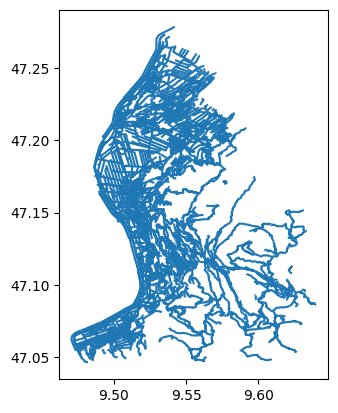

In [4]:
features.plot()

This shows all the highway features of Liechtenstein, including footways and paths:

In [5]:
features

,geometry,highway,name,cycleway:both,lane_markings,oneway,surface,lanes,maxspeed,smoothness,...,informal,bench,operator,shelter,traffic_calming,vehicle:conditional,agricultural,old_name,crossing,bin
0,"LINESTRING (9.54963 47.18788, 9.54968 47.18792...",residential,In den Äusseren,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"LINESTRING (9.54173 47.18223, 9.54212 47.18255...",tertiary,Dorfstrasse,no,no,no,asphalt,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"LINESTRING (9.51716 47.17078, 9.51719 47.17074...",tertiary,Planknerstrasse,NaN,NaN,no,asphalt,2,50,good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"LINESTRING (9.55048 47.18784, 9.55042 47.18778...",residential,Oberplanknerstrasse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"LINESTRING (9.54627 47.18504, 9.54649 47.18508...",residential,Im Häldele,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7501,"LINESTRING (9.54458 47.18668, 9.54461 47.18667)",footway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7502,"LINESTRING (9.54374 47.18631, 9.54395 47.18649)",service,Unterm Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7503,"LINESTRING (9.54434 47.18478, 9.54444 47.18474)",steps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7504,"LINESTRING (9.54470 47.18497, 9.54471 47.18501)",service,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It also contains all possible tags, that an OSM object can have. We are only interested in a selected number of tags. The GeoHandler can be instructed to restrict the tags, it adds to the properties:

In [6]:
fp = osmium.FileProcessor('../data/liechtenstein.osm.pbf')\
         .with_locations()\
         .with_filter(osmium.filter.EntityFilter(osmium.osm.WAY))\
         .with_filter(osmium.filter.KeyFilter('highway'))\
         .with_filter(osmium.filter.GeoInterfaceFilter(tags=['highway', 'name', 'maxspeed']))

features = geopandas.GeoDataFrame.from_features(fp)

This leaves us with a more concise data frame:

In [7]:
features

,geometry,highway,name,maxspeed
0,"LINESTRING (9.54963 47.18788, 9.54968 47.18792...",residential,In den Äusseren,NaN
1,"LINESTRING (9.54173 47.18223, 9.54212 47.18255...",tertiary,Dorfstrasse,NaN
2,"LINESTRING (9.51716 47.17078, 9.51719 47.17074...",tertiary,Planknerstrasse,50
3,"LINESTRING (9.55048 47.18784, 9.55042 47.18778...",residential,Oberplanknerstrasse,NaN
4,"LINESTRING (9.54627 47.18504, 9.54649 47.18508...",residential,Im Häldele,NaN
...,...,...,...,...
7501,"LINESTRING (9.54458 47.18668, 9.54461 47.18667)",footway,NaN,NaN
7502,"LINESTRING (9.54374 47.18631, 9.54395 47.18649)",service,Unterm Rain,NaN
7503,"LINESTRING (9.54434 47.18478, 9.54444 47.18474)",steps,NaN,NaN
7504,"LINESTRING (9.54470 47.18497, 9.54471 47.18501)",service,NaN,NaN


All that is left, to plot the ways according to their maxspeed:

<Axes: >

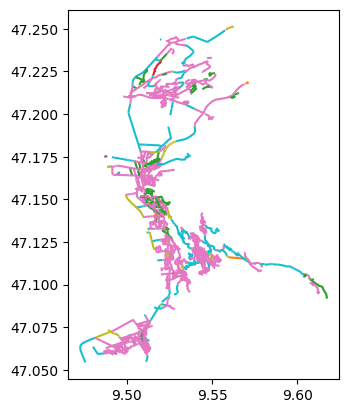

In [8]:
features.plot("maxspeed")